In [1]:
import pandas as pd # Импорт библиотеки
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import anderson
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
from scipy.stats import median_test

df = pd.read_excel('SOI_2.xls')
display(df)

,Провинции,Общий итог,Общее количество газет и журналов,"Газета, публикующая официальные объявления","Газета и журнал, публикующие официальную рекламу",Общее количество новостных сайтов в Интернете,"Интернет-новостной сайт, опубликовавший официальное объявление","Новостной сайт в Интернете, публикующий официальную рекламу"
0,Всего,2040,1227,753,474,813,349,464
1,Адана,33,23,14,9,10,5,5
2,Адыяман,14,7,7,0,7,7,0
3,Афьонкарахисар,20,15,15,0,5,3,2
4,Агры,7,5,5,0,2,2,0
...,...,...,...,...,...,...,...,...
77,Ушак,10,6,6,0,4,4,0
78,Ван,18,12,12,0,6,6,0
79,Ялова,8,4,3,1,4,2,2
80,Йозгат,17,14,14,0,3,3,0


### Наглядное представление

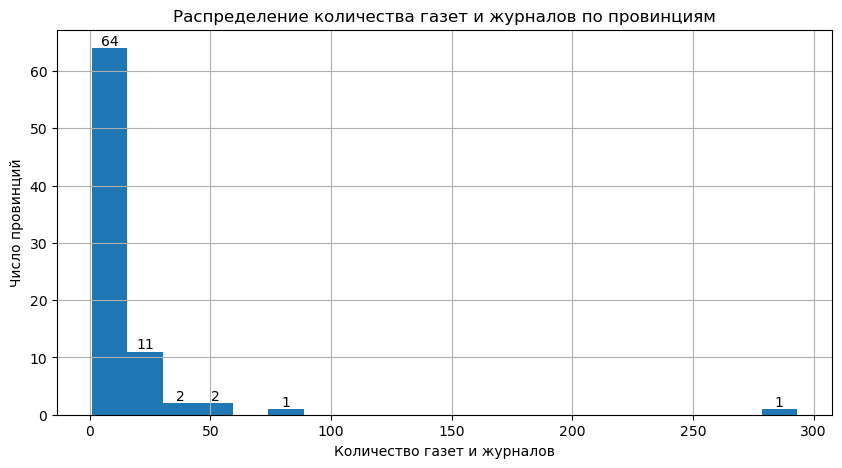

In [2]:
# Гистограмма распределения количества газет и журналов по провинциям
df_clean = df[df['Провинции'] != 'Всего'].copy() # Удаление строки "Всего"
values1 = df_clean['Общее количество газет и журналов'].dropna()

plt.figure(figsize=(10, 5))
counts, bins, patches = plt.hist(values1, bins=20)

plt.title('Распределение количества газет и журналов по провинциям')
plt.xlabel('Количество газет и журналов')
plt.ylabel('Число провинций')
plt.grid(True)

# Добавление подписей на каждый столбец
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:  # Подпись только, если столбец не пустой
        x = (bin_left + bin_right) / 2  # Центр столбца
        y = count
        plt.text(x, y, str(int(count)), ha='center', va='bottom')

plt.show()

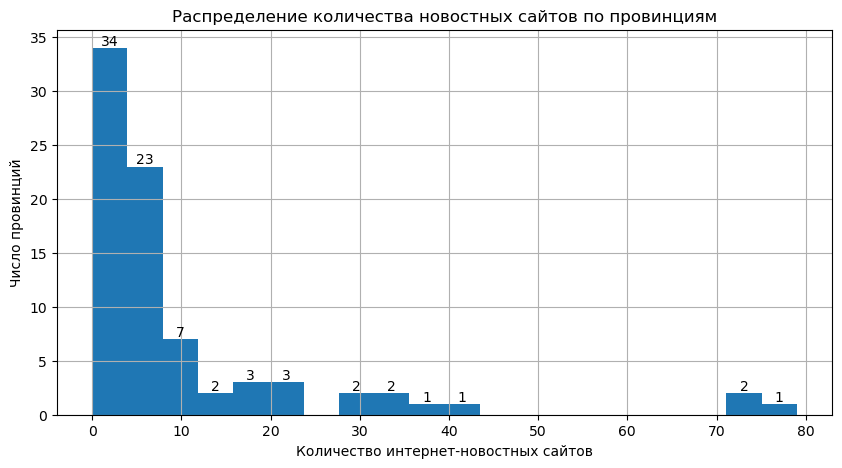

In [3]:
# Гистограмма распределения количества новостных сайтов по провинциям
values2 = df_clean['Общее количество новостных сайтов в Интернете'].dropna()

plt.figure(figsize=(10, 5))
counts, bins, patches = plt.hist(values2, bins=20)

plt.title('Распределение количества новостных сайтов по провинциям')
plt.xlabel('Количество интернет-новостных сайтов')
plt.ylabel('Число провинций')
plt.grid(True)

# Добавление подписей на каждый столбец
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:  # Подпись только, если столбец не пустой
        x = (bin_left + bin_right) / 2  # Центр столбца
        y = count
        plt.text(x, y, str(int(count)), ha='center', va='bottom')

plt.show()

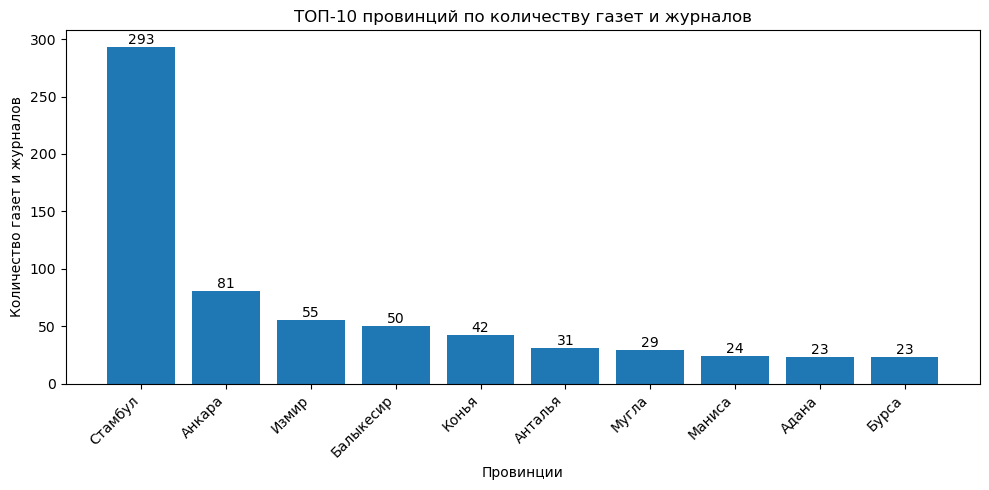

In [4]:
# Гистограмма топ-10 газет и журналов
top10_1 = df_clean.sort_values('Общее количество газет и журналов', ascending=False).head(10)

plt.figure(figsize=(10, 5))
bars = plt.bar(top10_1['Провинции'], top10_1['Общее количество газет и журналов'])

plt.title('ТОП-10 провинций по количеству газет и журналов')
plt.xlabel('Провинции')
plt.ylabel('Количество газет и журналов')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height,
             str(int(height)),
             ha='center', va='bottom')

plt.show()

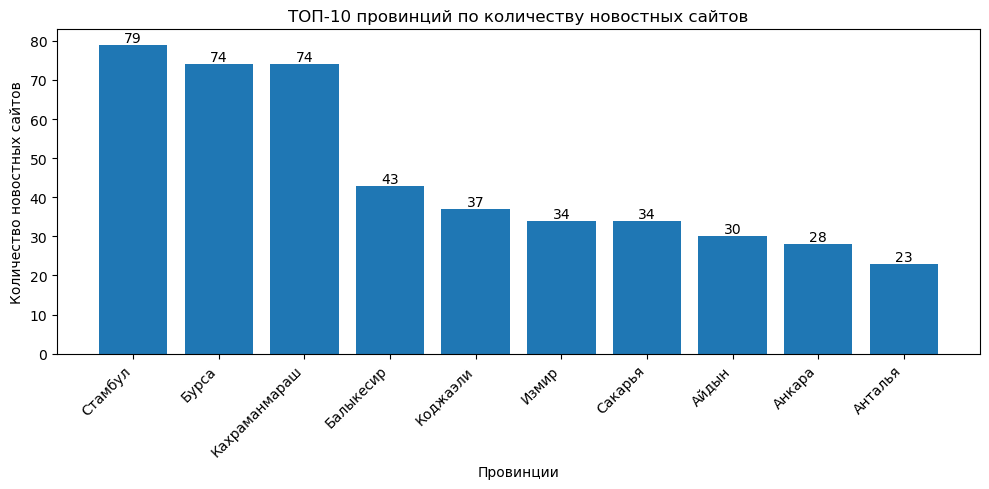

In [5]:
# Гистограмма топ-10 новостных сайтов
top10_2 = df_clean.sort_values('Общее количество новостных сайтов в Интернете', ascending=False).head(10)

plt.figure(figsize=(10, 5))
bars = plt.bar(top10_2['Провинции'], top10_2['Общее количество новостных сайтов в Интернете'])

plt.title('ТОП-10 провинций по количеству новостных сайтов')
plt.xlabel('Провинции')
plt.ylabel('Количество новостных сайтов')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height,
             str(int(height)),
             ha='center', va='bottom')

plt.show()

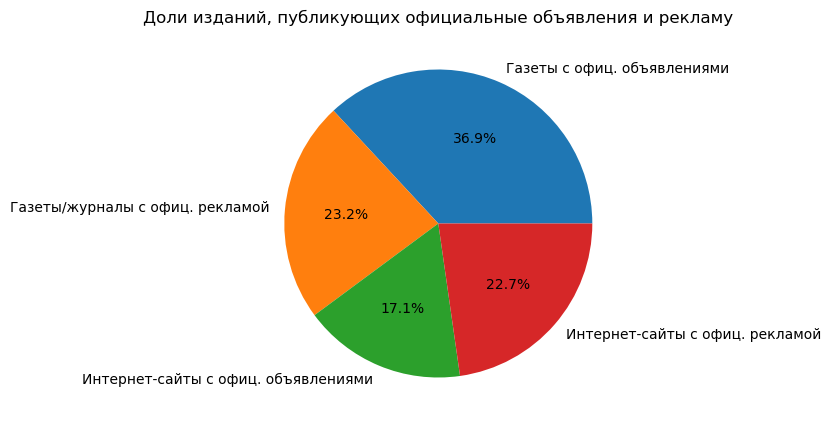

In [6]:
# Круговая диаграмма доли изданий, публикующих официальные объявления и рекламу
values = [
    df_clean['Газета, публикующая официальные объявления'].sum(),
    df_clean['Газета и журнал, публикующие официальную рекламу'].sum(),
    df_clean['Интернет-новостной сайт, опубликовавший официальное объявление'].sum(),
    df_clean['Новостной сайт в Интернете, публикующий официальную рекламу'].sum()
]

labels = [
    'Газеты с офиц. объявлениями',
    'Газеты/журналы с офиц. рекламой',
    'Интернет-сайты с офиц. объявлениями',
    'Интернет-сайты с офиц. рекламой'
]

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Доли изданий, публикующих официальные объявления и рекламу')

plt.show()

### Критерии

In [7]:
# Критерий Андерсона-Дарлинга
values = df_clean['Общее количество новостных сайтов в Интернете'].dropna()

result = anderson(values, dist='norm')
print(f"Результат критерия Андерсона-Дарлинга:\n{result}")

Результат критерия Андерсона-Дарлинга:
AndersonResult(statistic=np.float64(11.717868901759005), critical_values=array([0.551, 0.627, 0.753, 0.878, 1.044]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(10.037037037037036), scale=np.float64(15.87170788261651))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [8]:
# Критерий Спирмена
# Выбор переменные
x = df_clean['Общее количество газет и журналов'].dropna()
y = df_clean['Общее количество новостных сайтов в Интернете'].dropna()

# Применяем критерий Спирмена
rho, p_value = spearmanr(x, y, nan_policy='omit')

print(f"Коэффициент корреляции Спирмена: {rho:.3f}")
print(f"p-value: {p_value:.3f}")

Коэффициент корреляции Спирмена: 0.711
p-value: 0.000


In [9]:
# Критерий Манна-Уитни
x = df_clean['Газета, публикующая официальные объявления'].dropna()
y = df_clean['Газета и журнал, публикующие официальную рекламу'].dropna()

stat, p_value = mannwhitneyu(x, y, alternative='two-sided')
print(f"Статистика U: {stat:.3f}")
print(f"p-value: {p_value:.3f}")

Статистика U: 5774.500
p-value: 0.000


In [10]:
# Медианный критерий
x = df_clean['Газета, публикующая официальные объявления'].dropna()
y = df_clean['Газета и журнал, публикующие официальную рекламу'].dropna()

stat, p_value, med, tbl = median_test(x, y)

print(f"Статистика χ²: {stat:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Общая медиана: {med:.3f}")


Статистика χ²: 61.766
p-value: 0.000
Общая медиана: 3.000


### Дополнительно

In [11]:
# Загрузка таблицы с населением
df_pop = pd.read_excel('SOI_2_extra.xls')

# Удаление строки "Всего"
df_pop = df_pop[df_pop['Провинции'] != 'Всего']

df_pop


,Провинции,2024
1,Адана,2268828
2,Адыяман,606620
3,Афьонкарахисар,751827
4,Агры,502130
5,Аксарай,340458
...,...,...
77,Ушак,310093
78,Ван,254838
79,Ялова,156006
80,Йозгат,559094


In [12]:
# Объединение
df_merged = df_clean.merge(df_pop, on='Провинции')
display(df_merged)

,Провинции,Общий итог,Общее количество газет и журналов,"Газета, публикующая официальные объявления","Газета и журнал, публикующие официальную рекламу",Общее количество новостных сайтов в Интернете,"Интернет-новостной сайт, опубликовавший официальное объявление","Новостной сайт в Интернете, публикующий официальную рекламу",2024
0,Адана,33,23,14,9,10,5,5,2268828
1,Адыяман,14,7,7,0,7,7,0,606620
2,Афьонкарахисар,20,15,15,0,5,3,2,751827
3,Агры,7,5,5,0,2,2,0,502130
4,Аксарай,9,8,8,0,1,1,0,340458
...,...,...,...,...,...,...,...,...,...
76,Ушак,10,6,6,0,4,4,0,310093
77,Ван,18,12,12,0,6,6,0,254838
78,Ялова,8,4,3,1,4,2,2,156006
79,Йозгат,17,14,14,0,3,3,0,559094


In [13]:
# Корреляция Спирмена между населением 2024 и количеством сайтов
rho, p_value = spearmanr(
    df_merged[2024],
    df_merged['Общее количество новостных сайтов в Интернете']
)

print(f"Коэффициент корреляции Спирмена: {rho:.3f}")
print(f"p-value: {p_value:.3f}")


Коэффициент корреляции Спирмена: 0.127
p-value: 0.259


In [14]:
# Создание показателя "сайтов на 100к населения"
df_merged['Сайтов_на_100к'] = (
    df_merged['Общее количество новостных сайтов в Интернете'] /
    df_merged[2024] * 100000
)

# Деление провинций по медиане населения
median_pop = df_merged[2024].median()

group_small = df_merged[df_merged[2024] < median_pop]['Сайтов_на_100к']
group_large = df_merged[df_merged[2024] >= median_pop]['Сайтов_на_100к']

# Манна–Уитни
u_stat, p_u = mannwhitneyu(group_small, group_large, alternative='two-sided')

print(f"Статистика U: {stat:.3f}")
print(f"p-value: {p_value:.3f}")


Статистика U: 61.766
p-value: 0.259
